# Deep lying Playmaker Attribute Analysis 2023/24

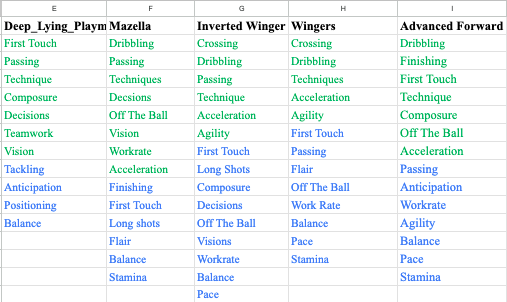

In [40]:
#Gonna have to do attribute analysis first, then I can do statistical analysis later. 
#loading the data into the spreadsheet
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
dlp_file_path = '/Users/JumpMan/Desktop/FM_Analytics_Project_Feb_2024/FM24_Player_Database/Arsenal_FM24_Save/Attributes/csv/Deep_Lying_Playmaker_attributes_2023_24.csv'
dlp_df = pd.read_csv(dlp_file_path)

In [42]:
dlp_df.head(20)

,UID,Name,Club,Position,Age,Transfer Value,Salary,Determination,Workrate,Positioning,...,Vision,Off The Ball,Teamwork,Bravery,Decisions,Balance,Composure,Technique,Passing,First Touch
0,83174762,Vitinha - Portuguese,Paris SG - Ligue 1 Uber Eats,"DM, M (C)",24,"£194,000,000.00","£170,000.00",14,15,14,...,16,15,16,15,15,15,15,16,16,15
1,37047745,Frenkie de Jong - Dutch,Barcelona - Spanish First Division,"DM, M (C)",27,"£171,000,000.00","£275,000.00",15,15,14,...,18,15,17,12,16,16,16,17,17,17
2,19297055,Bruno Guimarães - Brazilian,Newcastle - English Premier Division,"DM, M (C)",26,"£154,000,000.00","£180,000.00",14,16,16,...,17,14,15,15,15,14,18,18,18,18
3,14157184,Alexis Mac Allister - Argentinian,Liverpool - English Premier Division,"DM, M/AM (C)",25,"£128,000,000.00","£150,000.00",14,15,14,...,16,14,15,14,16,12,16,16,16,16
4,67216396,Fabián - Spanish,Paris SG - Ligue 1 Uber Eats,"DM, M/AM (C)",28,"£94,000,000.00","£155,000.00",13,13,14,...,15,14,15,12,16,16,14,16,16,16
5,92039023,Joshua Kimmich - German,FC Bayern - Bundesliga,"D/WB (R), DM, M (C)",29,"£75,500,000.00","£300,000.00",20,20,12,...,18,12,18,14,14,16,18,16,18,16
6,12080051,Pape Matar Sarr - Senegalese,Tottenham - English Premier Division,M (C),21,"£74,500,000.00","£81,000.00",16,14,15,...,14,13,14,14,14,15,16,14,14,15
7,92026209,Hakan Çalhanoğlu - Turkish,Inter - Italian Serie A,"DM, M (C), AM (LC)",30,"£71,500,000.00","£170,000.00",12,10,12,...,17,14,16,10,15,12,16,16,18,17
8,24016925,Mateo Kovačić - Croatian,Man City - English Premier Division,"DM, M (C)",30,"£55,000,000.00","£165,000.00",17,17,12,...,15,13,15,14,14,16,18,17,14,16
9,55070307,Rúben Neves - Portuguese,Al-Hilal (KSA) - Saudi Professional League,"DM, M (C)",27,"£54,000,000.00","£400,000.00",16,15,14,...,17,12,16,12,15,14,15,16,17,14


In [43]:
print(dlp_df.columns)

Index(['UID', 'Name', 'Club', 'Position', 'Age', 'Transfer Value', 'Salary',
       'Determination', 'Workrate', 'Positioning', 'Anticipation', 'Tackling',
       'Vision', 'Off The Ball', 'Teamwork', 'Bravery', 'Decisions', 'Balance',
       'Composure', 'Technique', 'Passing', 'First Touch'],
      dtype='object')


In [44]:
#Calculator Stuff
dlp_df['dlp_key']= ((
    dlp_df['First Touch'] + 
    dlp_df['Passing'] + 
    dlp_df['Technique'] + 
    dlp_df['Composure'] + 
    dlp_df['Decisions'] + 
    dlp_df['Teamwork'] + 
    dlp_df['Vision'] + 
    dlp_df['Determination'] 
) * 4)



dlp_df['dlp_important'] = ((
    dlp_df['Tackling'] + 
    dlp_df['Positioning'] + 
    dlp_df['Balance'] + 
    dlp_df['Off The Ball'] + 
    dlp_df['Anticipation']  
) * 3)

dlp_df['dlp_score'] = ((dlp_df['dlp_key'] + dlp_df['dlp_important']) / 53)
dlp_df['dlp_score'] = dlp_df['dlp_score'].round(1)


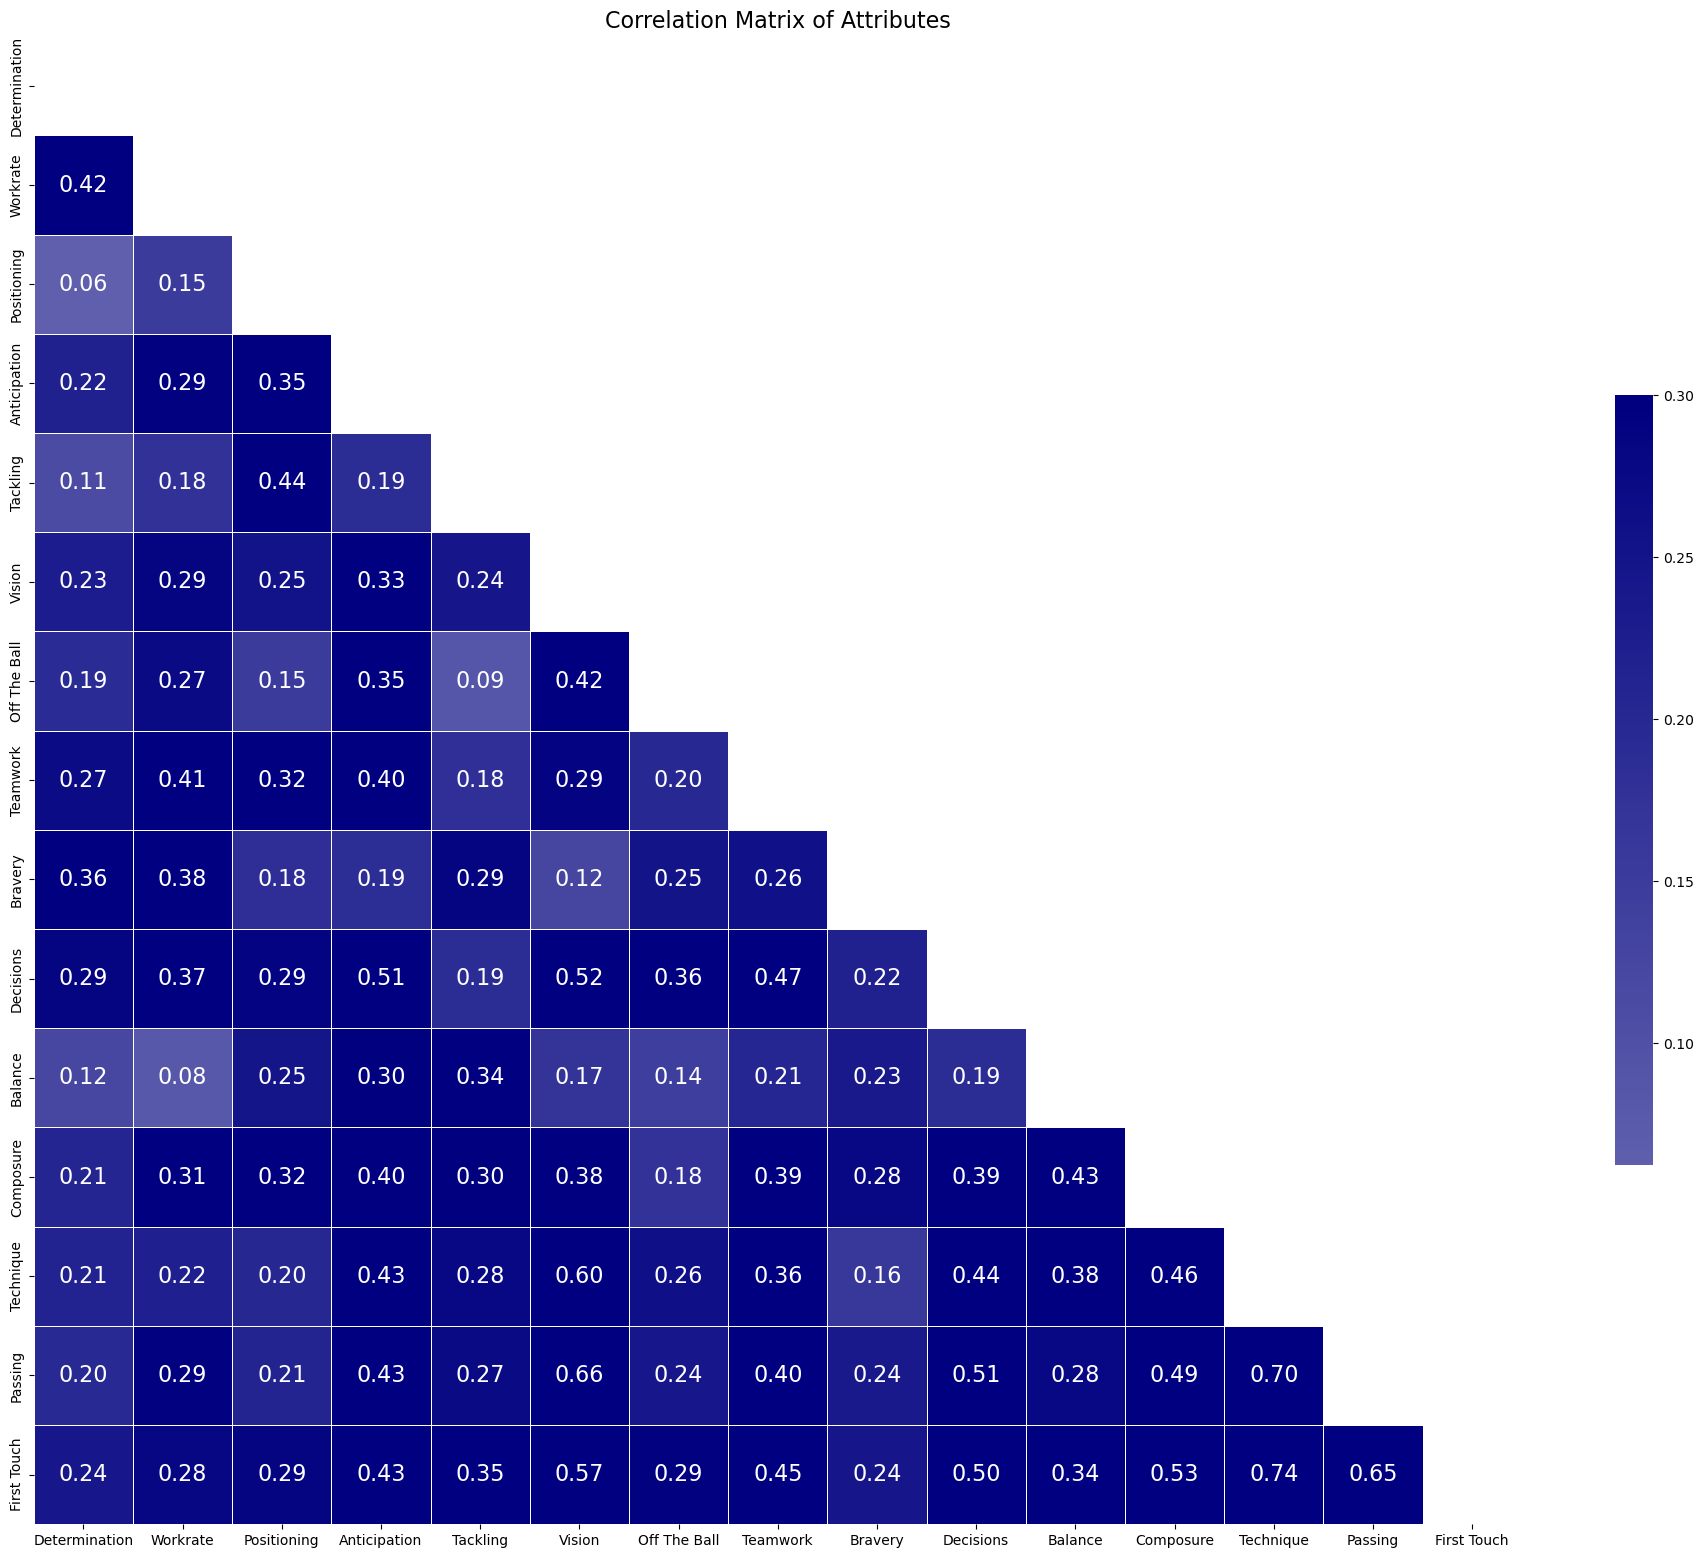

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np  # Add this line to import numpy

# Select the columns of interest
attributes = ['Determination', 'Workrate', 'Positioning', 
              'Anticipation', 'Tackling', 'Vision', 'Off The Ball', 'Teamwork', 
              'Bravery', 'Decisions', 'Balance', 'Composure', 'Technique', 
              'Passing', 'First Touch']

# Compute the correlation matrix
correlation_matrix = dlp_df[attributes].corr()

# Set up the matplotlib figure
plt.figure(figsize=(24, 20))

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Generate a custom sequential colormap with varying shades of blue
cmap = sns.light_palette("navy", as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".2f", annot_kws={"fontsize":16})

plt.title('Correlation Matrix of Attributes', fontsize=16)  # Increase title font size
plt.show()


In [46]:
# Selecting the desired columns from the original DataFrame
selected_columns = ['UID', 'Name', 'Club', 'Age' ,'Position', 'Transfer Value', 'Salary', 'Age', 
                    'dlp_key', 'dlp_important', 'dlp_score']

# Creating a new DataFrame with the selected columns from ball_playing_defender_df
new_dlp_df = dlp_df[selected_columns]

# Displaying the new DataFrame
new_dlp_df.head(41)


,UID,Name,Club,Age,Position,Transfer Value,Salary,Age,dlp_key,dlp_important,dlp_score
0,83174762,Vitinha - Portuguese,Paris SG - Ligue 1 Uber Eats,24,"DM, M (C)","£194,000,000.00","£170,000.00",24,492,216,15.1
1,37047745,Frenkie de Jong - Dutch,Barcelona - Spanish First Division,27,"DM, M (C)","£171,000,000.00","£275,000.00",27,532,225,16.1
2,19297055,Bruno Guimarães - Brazilian,Newcastle - English Premier Division,26,"DM, M (C)","£154,000,000.00","£180,000.00",26,532,222,16.0
3,14157184,Alexis Mac Allister - Argentinian,Liverpool - English Premier Division,25,"DM, M/AM (C)","£128,000,000.00","£150,000.00",25,500,207,15.0
4,67216396,Fabián - Spanish,Paris SG - Ligue 1 Uber Eats,28,"DM, M/AM (C)","£94,000,000.00","£155,000.00",28,484,216,14.9
5,92039023,Joshua Kimmich - German,FC Bayern - Bundesliga,29,"D/WB (R), DM, M (C)","£75,500,000.00","£300,000.00",29,552,204,16.1
6,12080051,Pape Matar Sarr - Senegalese,Tottenham - English Premier Division,21,M (C),"£74,500,000.00","£81,000.00",21,468,216,14.6
7,92026209,Hakan Çalhanoğlu - Turkish,Inter - Italian Serie A,30,"DM, M (C), AM (LC)","£71,500,000.00","£170,000.00",30,508,192,14.9
8,24016925,Mateo Kovačić - Croatian,Man City - English Premier Division,30,"DM, M (C)","£55,000,000.00","£165,000.00",30,504,216,15.3
9,55070307,Rúben Neves - Portuguese,Al-Hilal (KSA) - Saudi Professional League,27,"DM, M (C)","£54,000,000.00","£400,000.00",27,504,204,15.1


In [47]:
import pandas as pd

# Creating a new DataFrame with the selected columns from dlp_df
new_dlp_df = dlp_df[selected_columns]

# Sort the DataFrame based on 'dlp_score' in descending order
new_dlp_df = new_dlp_df.sort_values(by='dlp_score', ascending=False)

# Create an empty string to store the HTML content
html_content = "<h1>Player Analysis Report</h1>"
html_content += "<table border='1'><tr><th>Name</th><th>Club</th><th>Age</th><th>Position</th><th>Transfer Value</th><th>Salary</th><th>DLP Score</th></tr>"

# Iterate over each row in the DataFrame
for index, player in new_dlp_df.iterrows():
    # Add a new row to the HTML table
    html_content += f"<tr><td>{player['Name']}</td><td>{player['Club']}</td><td>{player['Age']}</td><td>{player['Position']}</td><td>{player['Transfer Value']}</td><td>{player['Salary']}</td><td>{player['dlp_score']}</td></tr>"

# Close the HTML table tag
html_content += "</table>"

# Save the HTML content to a file
with open("player_analysis_report.html", "w") as file:
    file.write(html_content)

print("HTML report generated successfully.")


HTML report generated successfully.


In [48]:
import pandas as pd

# Assuming you already have the DataFrame 'dlp_df' containing the data

# Group the DataFrame by 'Age' and find the player with the highest 'dlp_score' in each age group
best_dlp_by_age = dlp_df.groupby('Age').apply(lambda x: x.loc[x['dlp_score'].idxmax()])

# Select the desired columns for the report
report_columns = ['Name', 'Club', 'Age', 'Position', 'Transfer Value', 'Salary', 'dlp_score']

# Create an HTML report
html_content = "<h1>Best DLP Players by Age</h1>"
html_content += "<table border='1'><tr><th>Name</th><th>Club</th><th>Age</th><th>Position</th><th>Transfer Value</th><th>Salary</th><th>DLP Score</th></tr>"

# Iterate over each row in the grouped DataFrame
for index, player in best_dlp_by_age.iterrows():
    # Add a new row to the HTML table
    html_content += f"<tr><td>{player['Name']}</td><td>{player['Club']}</td><td>{player['Age']}</td><td>{player['Position']}</td><td>{player['Transfer Value']}</td><td>{player['Salary']}</td><td>{player['dlp_score']}</td></tr>"

# Close the HTML table tag
html_content += "</table>"

# Save the HTML content to a file
with open("best_dlp_by_age_report.html", "w") as file:
    file.write(html_content)

print("HTML report generated successfully.")


HTML report generated successfully.
